In [10]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image 
import tensorflow.keras.backend as K
from numpy.linalg import norm
# Display
from IPython.display import Image as Image1
from IPython.display import display


import matplotlib.pyplot as plt
import matplotlib.cm as cm

2023-03-07 04:33:35.051178: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-07 04:33:35.646321: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-07 04:33:35.646552: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-07 04:33:40.362494: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [18]:

#model_builder = keras.applications.xception.Xception
model_builder = keras.applications.inception_resnet_v2
img_size = (299, 299)
preprocess_input = keras.applications.inception_resnet_v2.preprocess_input
decode_predictions = keras.applications.inception_resnet_v2.decode_predictions

model = InceptionResNetV2(weights='imagenet', include_top=False)

#last_conv_layer_name = "block14_sepconv2_act"
#last_conv_layer_name = "conv2d_204"

# The local path to our target image

#img_path = "n02085620/n02085620_7.JPEG"
img_path = "val_00004407.JPEG"
#img_path = "elephant.jpg"
#img_path = keras.utils.get_file(
 #   "african_elephant.jpg", "https://i.imgur.com/Bvro0YD.png"
#)

display(Image1(img_path))


KeyboardInterrupt: 

In [ ]:
import os
path = "/mnt/c/Users/soaba/code/CNN/n02116738"
dir_list = os.listdir(path)

1/1 [==============================] - 12s 12s/step
[[('n03026506', 'Christmas_stocking', 0.19912842), ('n02883205', 'bow_tie', 0.13605629), ('n04235860', 'sleeping_bag', 0.051616866), ('n02834397', 'bib', 0.04825091), ('n01983481', 'American_lobster', 0.045408312)]]


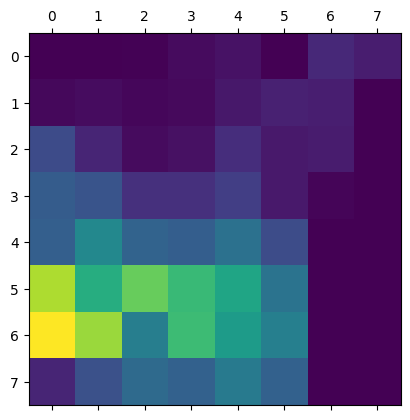

In [ ]:
#img_path = path+'/'+dir_list[65]     #img_path

dim = 299

img = image.load_img(img_path, target_size=(dim, dim))
model = InceptionResNetV2(weights='imagenet')

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print(decode_predictions(preds))

with tf.GradientTape() as tape:
  last_conv_layer = model.get_layer('conv_7b_ac')
  iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
  model_out, last_conv_layer = iterate(x)
  class_out = model_out[:, np.argmax(model_out[0])]
  grads = tape.gradient(class_out, last_conv_layer)
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  
heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)

heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = heatmap.reshape((8, 8))
plt.matshow(heatmap)
plt.show()

/tmp/ipykernel_434/2871075848.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


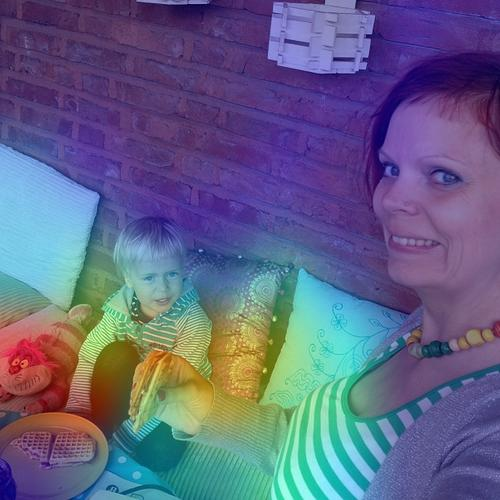

In [ ]:
#Create a superimposed visualization
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.8):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    return display(Image1(cam_path)), jet_heatmap

display_imag, jet_h = save_and_display_gradcam(img_path, heatmap)
display_imag


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


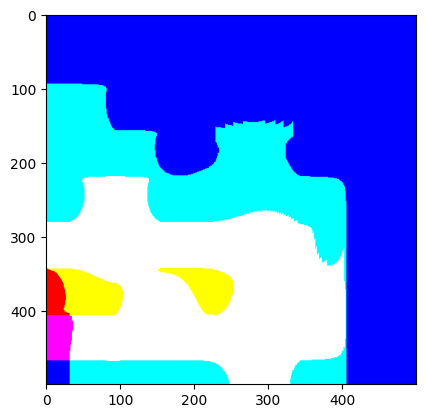

In [ ]:
#_, jet_h = save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.8)
plt.imshow(jet_h)

In [ ]:
superimposed_img = keras.preprocessing.image.array_to_img(jet_h)
# Save the superimposed image
superimposed_img.save('heat_el_2.jpg')

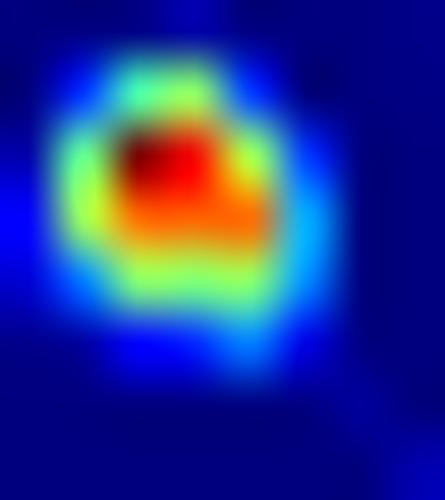

In [ ]:
display(Image1('heat_el_2.jpg'))

In [ ]:
jet_h[158, 169]

array([202.,   0.,   0.], dtype=float32)

In [ ]:
rr = np.argwhere((jet_h[:,:,0]> jet_h[:,:, 1]) & (jet_h[:,:,0] > jet_h[:,:,2]) & (jet_h[:,:,1] <= 10) & (jet_h[:,:,2] <= 10))
rr.shape

(1733, 2)

In [ ]:
jet_h[141, 226]

array([233.,   9.,   4.], dtype=float32)

In [4]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image 
import tensorflow.keras.backend as K
from numpy.linalg import norm
# Display
from IPython.display import Image as Image1
from IPython.display import display


import matplotlib.pyplot as plt
import matplotlib.cm as cm

2023-03-07 13:55:55.028571: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-07 13:55:55.648763: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-07 13:55:55.648789: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-07 13:55:57.671170: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [5]:
from PIL import Image
from numpy import asarray
import math

model_builder = keras.applications.inception_resnet_v2
img_size = (299, 299)
preprocess_input = keras.applications.inception_resnet_v2.preprocess_input
decode_predictions = keras.applications.inception_resnet_v2.decode_predictions

model = InceptionResNetV2(weights='imagenet', include_top=False)



def num_array(img_path):
    # open image as numpy array

    img_ = Image.open(img_path)
    num_img = asarray(img_)
    return num_img

def red_regions(jet_heatmap):
    rr = np.argwhere((jet_heatmap[:,:,0] >= 220) & (jet_heatmap[:,:,0]> jet_heatmap[:,:, 1]) & (jet_heatmap[:,:,0] > jet_heatmap[:,:,2]) & (jet_heatmap[:,:,1] <= 10) & (jet_heatmap[:,:,2] <= 10))

    return rr

def array_coord(jet_heatmap, perc, dim= 299):
    # Obtain red regions in heat map of high intensity
    rr = red_regions(jet_heatmap)
    coord_arr = []
    for coord in rr:
        coord_arr.append((coord, max(jet_heatmap[coord[0], coord[1]]) ))
    # sort a list of ordered tuples
    n = len(coord_arr)

    coord_arr.sort(key= lambda x: x[1], reverse = True)

    B = list(zip(*coord_arr))[0]
    
    return coord_arr, np.asarray(B)[0:math.ceil(perc*n/100)]
        

def image_patches(img_path, jet_heatmap, perc, dim=299):
    
    # Obtain significant 3x3 patches of image features
    if len(array_coord(jet_heatmap, perc, dim=299)[0])!=0:
        _, coord = array_coord(jet_heatmap, perc, dim=299)
        num_img = num_array(img_path)
        list_patches = []
        for x in coord:
            if len(num_img[x[0]:(x[0]+3), x[1]:(x[1]+3)].flatten())==27:
                list_patches.append(num_img[x[0]:(x[0]+3), x[1]:(x[1]+3)])
    
    return list_patches




def get_heatmap(img_path, dim = 299):
    
    # Get 8x8 heatmap feature
    
    img = image.load_img(img_path, target_size=(dim, dim))
    model = InceptionResNetV2(weights='imagenet')

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    #preds = model.predict(x)


    with tf.GradientTape() as tape:
        last_conv_layer = model.get_layer('conv_7b_ac')
        iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
        model_out, last_conv_layer = iterate(x)
        class_out = model_out[:, np.argmax(model_out[0])]
        grads = tape.gradient(class_out, last_conv_layer)
        pooled_grads = K.mean(grads, axis=(0, 1, 2))
  
    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)

    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    heatmap = heatmap.reshape((8, 8))
    return heatmap
    #plt.matshow(heatmap)
    #plt.show()


def get_jet_heatmap(img_path, dim= 299):

    heatmap = get_heatmap(img_path, dim=299 )

    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    return jet_heatmap
    

def patches_n_folder(dir_list, perc , dim=299):
    path = "/mnt/c/Users/soaba/code/CNN/n02116738"
    big_list = []
    for x in dir_list:
        jet_heatmap = get_jet_heatmap(path+'/'+x, dim=299)
        rr = red_regions(jet_heatmap)
        if len(rr)!=0:

            patches = image_patches(path+'/'+x, jet_heatmap, perc, dim=299)
            for y in patches:
                big_list.append(y)
    
    return big_list



2023-03-07 13:56:07.580481: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-07 13:56:07.580539: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-07 13:56:07.580645: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-88TBBTR): /proc/driver/nvidia/version does not exist
2023-03-07 13:56:07.581562: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
result1 = patches_n_folder(dir_list, perc=50, dim=299)

In [8]:
len(result1)

46995

In [6]:
import os
path = "/mnt/c/Users/soaba/code/CNN/n02116738"
dir_list = os.listdir(path)

In [64]:
dir_list[35:36]

['n02116738_2344.JPEG']

In [21]:
import pickle
# List of relevant 3x3 features in "hyena-like animals"
outfilez = open('patches_chi_hy.pckl', 'wb')
pickle.dump(Q, outfilez)
outfilez.close()


In [15]:
import pickle
with open('patches_fold2_d3.pckl', 'rb') as handle:
    imagenet2= pickle.load(handle)

In [1]:
import pickle
with open('patches_chi_hy.pckl', 'rb') as handle:
    imagenet= pickle.load(handle)

In [20]:
Q = np.zeros(shape = (len(imagenet1)+len(imagenet2), 27))
for i in range(len(imagenet1)):
    Q[i] = imagenet1[i].flatten()

for i in range(len(imagenet2)):
    Q[i+len(imagenet1)] = imagenet2[i].flatten()


In [ ]:
import os
path = "/mnt/c/Users/soaba/code/CNN/n02116738"
dir_list = os.listdir(path)

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import math
from sklearn.manifold import Isomap
from numpy.linalg import norm
from ripser import ripser
from persim import plot_diagrams
import warnings
warnings.filterwarnings('ignore')

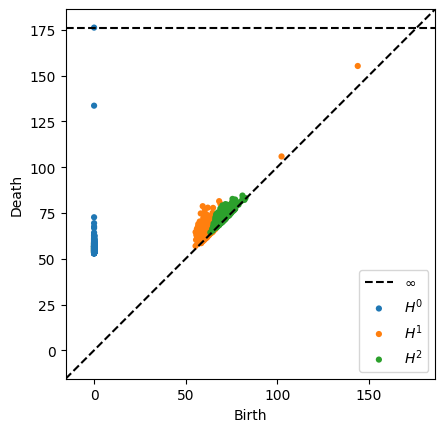

In [10]:
ripser_out_z2 = ripser(P, coeff=2, do_cocycles = True, maxdim = 2, n_perm = 500)
dgmsz2 = ripser_out_z2['dgms']
plot_diagrams(dgmsz2, labels = ["$H^0$", "$H^1$", "$H^2$", "$H^3$"])
#plt.title("$\mathbb{Z}_{11}$ Coefficient")
#plt.savefig("Z00.png")

In [3]:
def dist_matrix(P, x, k):
    distances = np.linalg.norm(P - x, axis=1)
    nearest_neighbor_ids = distances.argsort()[k]
    return x, distances[nearest_neighbor_ids]

def density_sort(P, k, perc):
    density_list = []
    n = P.shape[0]
    for i in range(n):
        density_list.append(dist_matrix(P, P[i],k))
    density_list.sort(key = lambda x:x[1], reverse = False)
    B = list(zip(*density_list[0:math.ceil(perc/100*n)]))[0]
    return np.asarray(B)

In [9]:
P = density_sort(imagenet, 250, 40)

In [ ]:
import pickle
# List of relevant 3x3 features in "hyena-like animals"
outfilez = open('patches_fold1_dense.pckl', 'wb')
pickle.dump(P, outfilez)
outfilez.close()